### 

#### 数据加载

In [1]:
import csv
import jieba

def load_stopwords(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        stopwords = set(line.strip() for line in f if line.strip())
    return stopwords

# 加载停用词表
stopwords = load_stopwords('./stopwords.txt')

# 用户评论数据集
ds_comments = []

# 1. Read the CSV file
with open('./DMSC.csv', 'r') as file:
    reader = csv.DictReader(file)

    for row in reader:
        vote = int(row['Star'])
        if vote not in [3]:
            words = jieba.lcut(row['Comment'])   
            words = [word for word in words if word not in stopwords]
            ds_comments.append((words, 1 if vote > 3 else 0))  # 1 for positive, 0 for negative
# 保存
import pickle
with open('./ds_comments.pkl', 'wb') as f:
    pickle.dump(ds_comments, f)
len(ds_comments)


Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Administrator\AppData\Local\Temp\jieba.cache
Loading model cost 0.506 seconds.
Prefix dict has been built successfully.


1650497

In [22]:
# 加载
with open('./ds_comments.pkl', 'rb') as f:
    ds_comments = pickle.load(f)
print(ds_comments[:10])
print(len(ds_comments))

[([' ', '非常', '失望', '剧本', '完全', '敷衍了事', '主线', '剧情', '没', '突破', '大家', '理解', '所有', '人物', '都', '缺乏', '动机', '正邪', '之间', '妇联', '内部', '都', '没什么', '火花', '团结', '-', '分裂', '-', '团结', '三段式', '老套', '其实', '利用', '积攒', '下来', '形象', '魅力', '搞', '出', '意思', '剧本', '写得', '非常', '肤浅', '平面', '场面', '上', '调度', '混乱', '呆板', '满屏', '铁甲', '审美疲劳', '笑', '点算', '上', '差强人意'], 0), ([' ', '2015', '年度', '最', '失望', '作品', '以为', '面面俱到', '实则', '画蛇添足', '以为', '主题深刻', '实则', '老调重弹', '以为', '推陈出新', '实则', '俗不可耐', '以为', '场面', '很', 'high', '实则', 'high', '劲', '不足', '气', '上', '一集', '趣味', '全无', '这集', '笑', '点', '明显', '刻意', '心虚', '全片', '没有', '片段', '紧张', '激动', '太弱', '奥创'], 0), ([' ', '铁人', '2', '中', '勾引', '钢铁', '侠', '妇联', '1', '中', '勾引', '鹰眼', '美队', '2', '中', '勾引', '美国', '队长', '妇联', '2', '中', '终于', '…', '…', '绿巨人', '表白', '黑寡妇', '实际行动', '告诉', '忠贞不二', '治疗', '不孕', '不育', '作战', '武器', '都', '变成', '两支', '验孕', '棒', '(', '坚决', '相信', '快银', '没有', '死', '后面', '还', '回来', ')'], 1), ([' ', '从头', '打到', '尾', '真的', '很', '无聊'], 0), ([' ', '一颗', '彩蛋', '必须', '降一星',

#### 分析评论长度，考虑截取过长，过短评论

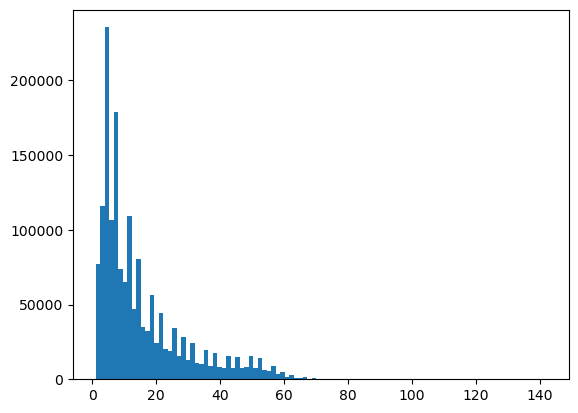

In [15]:
import matplotlib.pyplot as plt

comments_len = [len(c) for c,v in ds_comments]
plt.hist(comments_len, bins=100)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

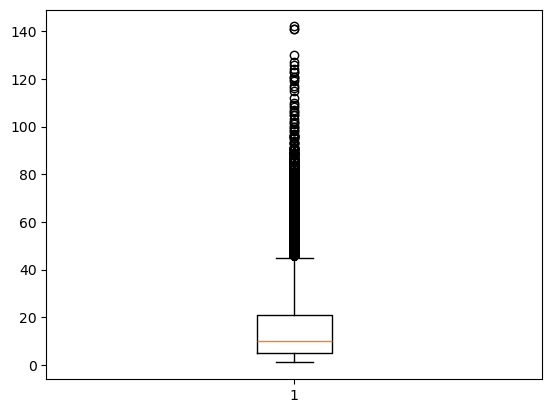

In [16]:
plt.boxplot(comments_len)
plt.show

In [23]:
# 评论词汇长度在10～150之间
ds_comments = [c for c in ds_comments if len(c[0]) in range(10, 10+1)]

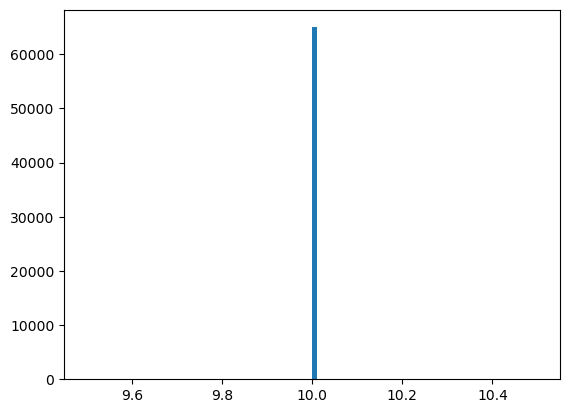

In [24]:
comments_len = [len(c) for c,v in ds_comments]
plt.hist(comments_len, bins=100)
plt.show()

In [25]:
import pickle

with open('./comments.pkl', 'wb') as f:
    pickle.dump(ds_comments, f)

In [26]:
# 加载训练语料
with open('comments.pkl', 'rb') as f:
    comments_data = pickle.load(f)
print(comments_data[:10])
print(len(comments_data))

[([' ', '刘大勇', '贾秀琰', '师徒', '真是', '狙击', '资本主义', '巨制', '界', '先锋'], 1), ([' ', '绝逼', '不', '质疑', '尾灯', '导演', '编剧', '水平', ' ', ' '], 1), ([' ', '再', '喊', '看', '这种', '电影', '急', '实在', '接受', '无能'], 0), ([' ', '很燃', '尾灯', '简直', '太', '懂', '粉丝', '心', '彩蛋', '福利'], 1), ([' ', '非常', '不错', '非常', '不错', '~', '非常', '吃', '一套', '~'], 1), ([' ', '不感兴趣', ' ', '特别', '没', '看', '1', ' ', '中文', '配音'], 0), ([' ', '人', '人', '升级', '下', '一部分', '两年', '放', '人', '人'], 1), ([' ', '不要', '小', '寡妇', '绿巨人', '好', '斯嘉丽', '女神', '收下', '膝盖'], 1), ([' ', '这是', '一部', '没有', '灵魂', '电影', '奥创', '不仅仅', '主演', '导演'], 0), ([' ', '最', '精彩', '一场', '打斗', '竟然', '人干', '人', '…', '…'], 0)]
64955


In [9]:
print('执行完成')

执行完成


In [ ]:
import sentencepiece as spm

def load_stopwords(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        stopwords = set(line.strip() for line in f if line.strip())
    return stopwords

# 加载停用词表
stopwords = load_stopwords('./stopwords.txt')

# 用户评论数据集
votes = []

# 1. Read the CSV file
with open('./DMSC.csv', 'r') as file:
    reader = csv.DictReader(file)

    for row in reader:
        vote = int(row['Star'])
        if vote not in [3]:
            words = row['Comment']
            # 将word按行合并到一个文件
            with open('Douban_comments.txt', 'a', encoding='utf-8') as f:
                f.write(words + '\n')
            # 使用sentencepiece进行分词
            
            votes.append((words, 1 if vote > 3 else 0))  # 1 for positive, 0 for negative
# 保存
import pickle
with open('./ds_comments.pkl', 'wb') as f:
    pickle.dump(ds_comments, f)

# 引入外部文本资料训练分词模型
spm.SentencePieceTrainer.Train(input='Douban_comments.txt', 
                               model_prefix='hlm_mod',
                               vocab_size=10000) # Train the model

# 加载模型进行分词
sp = spm.SentencePieceProcessor(model_file='hlm_mod.model')
# 测试分词
print(sp.EncodeAsPieces('尤氏的母亲并邢夫人、王夫人、凤姐儿都吃毕饭，漱了口，净了手，才说要往园子里去。')) # 分词